## Task1 Acquisition of data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
# pd.read_csv(csv_file)
df = pd.read_csv('train.csv')

## Task2 Research the data

In [3]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

コンペティションの目的

アイオワ州の住宅価格を79の説明変数から予測できるようにする.

datasetは住宅価格に大きく寄与するものからそうでないものまである.

目的変数 SalePrice  - 施設の売却価格（ドル)

説明変数 79ある. irisと比較して異なるのが説明変数の数と思われる.すべてを使って分析するのではなく良い変数を選ぶ必要があると感じる.

建物のグレード、面積や鉄道・道路の近さ、築年数、部屋の数は関係ありそう

ガレージやキッチン、バスルーム、暖炉に関するものは相関が低そうというように予想(感覚)

## Task3 Confirm the data

In [4]:
# See how each feature looks like
# Show data type
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [5]:
# column名から行番号を取得する
print(df.columns.get_loc('SalePrice'))

80


In [6]:
# 統計量はdescribe()で取得
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Task4 Correspondence of null

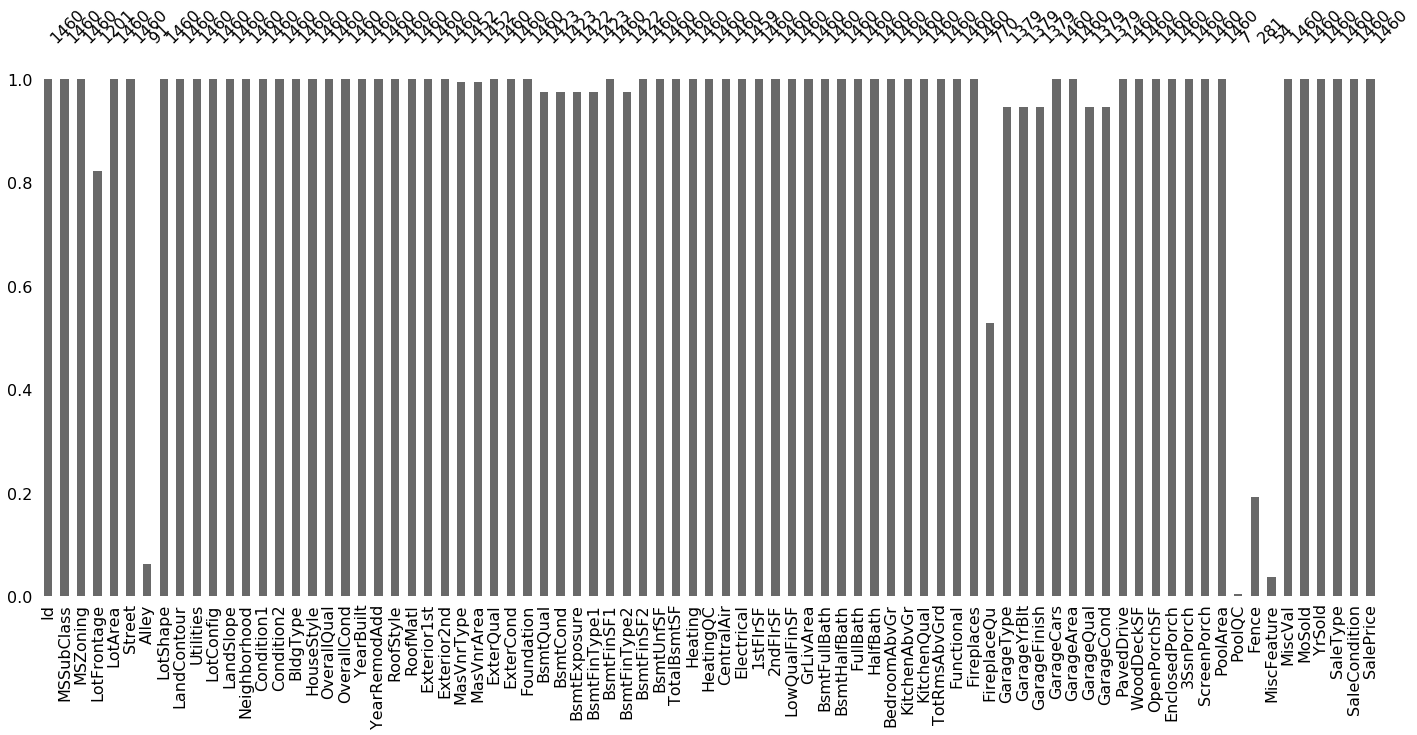

In [7]:
# 各特徴量の欠損値の有無を確認する missingno
import missingno as msno
# dataが1であれば欠損値なし
msno.bar(df)

In [8]:
#欠損値が何パーセント含まれるかを確認する。
total_null_number = df.isnull().sum()

all_number = 1460 # numbers of data per columns is 1460
#print(all_number)
missing_rate = total_null_number / all_number
print('{}'.format(missing_rate*100))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [9]:
df_2 = pd.DataFrame({'Total':total_null_number, 'missing_rate[%]':missing_rate})
print(df_2)

               Total  missing_rate[%]
Id                 0         0.000000
MSSubClass         0         0.000000
MSZoning           0         0.000000
LotFrontage      259         0.177397
LotArea            0         0.000000
Street             0         0.000000
Alley           1369         0.937671
LotShape           0         0.000000
LandContour        0         0.000000
Utilities          0         0.000000
LotConfig          0         0.000000
LandSlope          0         0.000000
Neighborhood       0         0.000000
Condition1         0         0.000000
Condition2         0         0.000000
BldgType           0         0.000000
HouseStyle         0         0.000000
OverallQual        0         0.000000
OverallCond        0         0.000000
YearBuilt          0         0.000000
YearRemodAdd       0         0.000000
RoofStyle          0         0.000000
RoofMatl           0         0.000000
Exterior1st        0         0.000000
Exterior2nd        0         0.000000
MasVnrType  

In [10]:
# 5つ以上欠損値がある特徴量（列）は削除する。
thresh = 1460-6
df_copy = df.copy()
df_drop_column = df_copy.dropna(axis='columns',thresh=thresh)
print(df_drop_column)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2        

In [11]:
# 欠損値があるサンプル（行）は削除する。
# DataFrameだとdefaultで欠損値が1つ以上ある行は削除される
df_drop_row = df.copy().dropna()
print(df_drop_row)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


## 欠損値の評価レポート
 まず欠損値の有無の棒グラフから直感的に欠損値がほとんどないグループと欠損値だらけのグループに分けられそうだと感じる
そこで列ごとの欠損値の割合をみると80%以上欠損値なのが4項目、10%以上80%未満が2項目、欠損値10%未満が7項目、欠損値なしが66項目だとわかる.
80%以上欠損値の群を削除してもよいし、10%以上欠損値があるものを削除しても、1つでも欠損値がある項目を削除してもよいと考えられる.
ただし、欠損値がある行を行単位で削除してしまうとデータがなくなったので行の削除は有効ではない.

## Task6 Survey of terminology

## 歪度(skewness)
分布の左右対称性のことを表し、正規分布では0となる.

Z=(x-μ)/σの3乗の平均で定義され、

S = 1/N * Z^3となる

計算としてはZの平均から右側のZ^3の和と左側ののZ^3の和を比較するので外れ値による
影響を受けるとZ=0でも左右対称にならない

S>0の場合左に偏り

S<0の場合右に偏る

S=0の場合左右対称になることもある(なるとは限らない)

## 尖度(kurtsis)
分布の尖り具合の指標.正規分布を0とする定義と3とする定義がある

歪度と同じくZ=(x-μ)/σとすると,こちらはZの4乗で定義される

K = 1/N * Z^4

Kが大きいほど裾が長く,ピークが高くなり

Kが小さいとなだらかな分布となる

## Task6 Confirm the distribution

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
歪度1.8828757597682129
尖度6.536281860064529


C:\Users\umini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


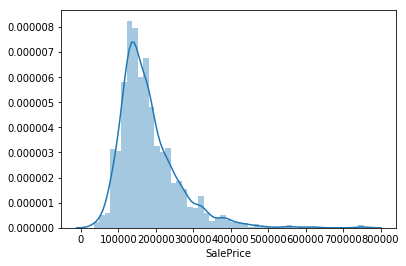

In [12]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する
y = df.copy().iloc[:,-1]
print(y.head())
sns.distplot(y)
# 歪度df.skew()
print('歪度{}'.format(y.skew()))
# 尖度df.kurtosis()
print('尖度{}'.format(y.kurtosis()))

In [13]:
# 目的変数に対して対数変換を行う
y_log =y.apply(np.log)
print(y_log)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

歪度0.12133506220520406
尖度0.8095319958036296


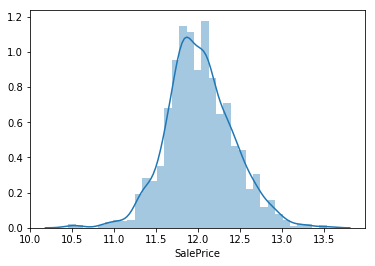

In [14]:
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
sns.distplot(y_log)
# 歪度df.skew()
print('歪度{}'.format(y_log.skew()))
# 尖度df.kurtosis()
print('尖度{}'.format(y_log.kurtosis()))

## 目的変数の対数変換によって
歪度、尖度ともに0に近づき正規分布に近くなっていることがわかる

## Task7 Confirm correlation coefficient

In [15]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
df_corr = df.copy().corr()
print(df_corr.iloc[-1,:])

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

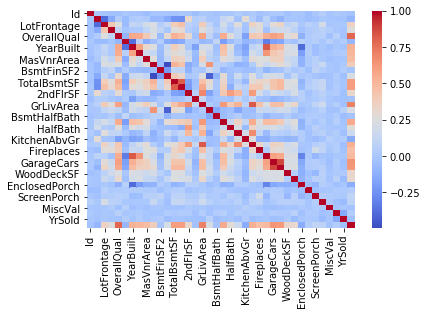

In [16]:
sns.heatmap(df_corr,cmap='coolwarm')

In [17]:
# SalePriceと相関のある説明変数をランキング上位から表示
df_sort = df_corr.copy().iloc[-1,:].sort_values(ascending=False)
print(df_sort)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [18]:
# SalePriceと上位10個の抜き出し
df_sort_ten = df_sort[0:11]
print(df_sort_ten)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


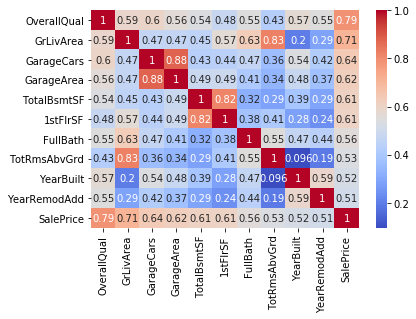

In [19]:
# 選んだ説明変数のDataFrameを作る
eleven_dict = {'OverallQual':df['OverallQual'], 
                    'GrLivArea':df['GrLivArea'],
                    'GarageCars':df['GarageCars'], 
                    'GarageArea':df['GarageArea'], 
                    'TotalBsmtSF':df['TotalBsmtSF'], 
                    '1stFlrSF':df['1stFlrSF'], 
                    'FullBath' :df['FullBath' ],
                    'TotRmsAbvGrd':df[ 'TotRmsAbvGrd'],
                    'YearBuilt':df['YearBuilt'],
                    'YearRemodAdd':df['YearRemodAdd'],
                    'SalePrice':df['SalePrice']
                    }

eleven_df = pd.DataFrame(eleven_dict)
#print(eleven_corr_df)
# 相関行列を作る
eleven_df_corr = eleven_df.copy().corr()
sns.heatmap(eleven_df_corr,cmap='coolwarm',annot=True)

In [39]:
eleven_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000
5,5,1362,2,480,796,796,1,5,1993,1995,143000
6,8,1694,2,636,1686,1694,2,7,2004,2005,307000
7,7,2090,2,484,1107,1107,2,7,1973,1973,200000
8,7,1774,2,468,952,1022,2,8,1931,1950,129900
9,5,1077,1,205,991,1077,1,5,1939,1950,118000


## 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語
OverallQual：全体的な素材と仕上げの品質

GrLivArea：地上のリビングエリアの面積平方フィート

GarageCars：自動車容量のガレージサイズ

GarageArea：ガレージサイズ（平方フィート）

TotalBsmtSF：地下室の面積総平方フィート

1stFlrSF：1階平方フィート

FullBath：グレード以上のフルバスルーム

TotRmsAbvGrd：グレード以上の総客室数（バスルームは含まれません）

YearBuilt：元の建設日

YearRemodAdd：改造日

In [20]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# OverallQual：
df_overallqual = eleven_df_corr.copy()['OverallQual'].sort_values(ascending=False)
print(df_overallqual)

#GarageCars      0.600671
#GrLivArea       0.593007
#YearBuilt       0.572323

OverallQual     1.000000
SalePrice       0.790982
GarageCars      0.600671
GrLivArea       0.593007
YearBuilt       0.572323
GarageArea      0.562022
YearRemodAdd    0.550684
FullBath        0.550600
TotalBsmtSF     0.537808
1stFlrSF        0.476224
TotRmsAbvGrd    0.427452
Name: OverallQual, dtype: float64


In [21]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# GrLivArea：
df_grlivarea = eleven_df_corr.copy()['GrLivArea'].sort_values(ascending=False)
print(df_grlivarea)

#TotRmsAbvGrd    0.825489
#FullBath        0.630012
#OverallQual     0.593007

GrLivArea       1.000000
TotRmsAbvGrd    0.825489
SalePrice       0.708624
FullBath        0.630012
OverallQual     0.593007
1stFlrSF        0.566024
GarageArea      0.468997
GarageCars      0.467247
TotalBsmtSF     0.454868
YearRemodAdd    0.287389
YearBuilt       0.199010
Name: GrLivArea, dtype: float64


In [22]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# GarageCars：
df_garagecars = eleven_df_corr.copy()['GarageCars'].sort_values(ascending=False)
print(df_garagecars)

#GarageArea      0.882475
#OverallQual     0.600671
#YearBuilt       0.537850

GarageCars      1.000000
GarageArea      0.882475
SalePrice       0.640409
OverallQual     0.600671
YearBuilt       0.537850
FullBath        0.469672
GrLivArea       0.467247
1stFlrSF        0.439317
TotalBsmtSF     0.434585
YearRemodAdd    0.420622
TotRmsAbvGrd    0.362289
Name: GarageCars, dtype: float64


In [23]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# GarageArea：
df_garagearea = eleven_df_corr.copy()['GarageArea'].sort_values(ascending=False)
print(df_garagearea)

#GarageCars      0.882475
#OverallQual     0.562022
#1stFlrSF        0.489782

GarageArea      1.000000
GarageCars      0.882475
SalePrice       0.623431
OverallQual     0.562022
1stFlrSF        0.489782
TotalBsmtSF     0.486665
YearBuilt       0.478954
GrLivArea       0.468997
FullBath        0.405656
YearRemodAdd    0.371600
TotRmsAbvGrd    0.337822
Name: GarageArea, dtype: float64


In [24]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# TotalBsmtSF：
df_totalbsmtsf = eleven_df_corr.copy()['TotalBsmtSF'].sort_values(ascending=False)
print(df_totalbsmtsf)

#1stFlrSF        0.819530
#OverallQual     0.537808
#GarageArea      0.486665

TotalBsmtSF     1.000000
1stFlrSF        0.819530
SalePrice       0.613581
OverallQual     0.537808
GarageArea      0.486665
GrLivArea       0.454868
GarageCars      0.434585
YearBuilt       0.391452
FullBath        0.323722
YearRemodAdd    0.291066
TotRmsAbvGrd    0.285573
Name: TotalBsmtSF, dtype: float64


In [25]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# 1stFlrSF：
df_1stflrsf = eleven_df_corr.copy()['1stFlrSF'].sort_values(ascending=False)
print(df_1stflrsf)

#TotalBsmtSF     0.819530
#GrLivArea       0.566024
#GarageArea      0.489782

1stFlrSF        1.000000
TotalBsmtSF     0.819530
SalePrice       0.605852
GrLivArea       0.566024
GarageArea      0.489782
OverallQual     0.476224
GarageCars      0.439317
TotRmsAbvGrd    0.409516
FullBath        0.380637
YearBuilt       0.281986
YearRemodAdd    0.240379
Name: 1stFlrSF, dtype: float64


In [26]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# FullBath：
df_fullbath = eleven_df_corr.copy()['FullBath'].sort_values(ascending=False)
print(df_fullbath)

#GrLivArea       0.630012
#TotRmsAbvGrd    0.554784
#OverallQual     0.550600

FullBath        1.000000
GrLivArea       0.630012
SalePrice       0.560664
TotRmsAbvGrd    0.554784
OverallQual     0.550600
GarageCars      0.469672
YearBuilt       0.468271
YearRemodAdd    0.439046
GarageArea      0.405656
1stFlrSF        0.380637
TotalBsmtSF     0.323722
Name: FullBath, dtype: float64


In [27]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# TotRmsAbvGrd：
df_totalrmsabvgrd = eleven_df_corr.copy()['TotRmsAbvGrd'].sort_values(ascending=False)
print(df_totalrmsabvgrd)

#GrLivArea       0.825489
#FullBath        0.554784
#OverallQual     0.427452

TotRmsAbvGrd    1.000000
GrLivArea       0.825489
FullBath        0.554784
SalePrice       0.533723
OverallQual     0.427452
1stFlrSF        0.409516
GarageCars      0.362289
GarageArea      0.337822
TotalBsmtSF     0.285573
YearRemodAdd    0.191740
YearBuilt       0.095589
Name: TotRmsAbvGrd, dtype: float64


In [28]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# YearBuilt：
df_yearbuilt = eleven_df_corr.copy()['YearBuilt'].sort_values(ascending=False)
print(df_yearbuilt)

#YearRemodAdd    0.592855
#OverallQual     0.572323
#GarageCars      0.537850

YearBuilt       1.000000
YearRemodAdd    0.592855
OverallQual     0.572323
GarageCars      0.537850
SalePrice       0.522897
GarageArea      0.478954
FullBath        0.468271
TotalBsmtSF     0.391452
1stFlrSF        0.281986
GrLivArea       0.199010
TotRmsAbvGrd    0.095589
Name: YearBuilt, dtype: float64


In [29]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ選ぶ
# YearRemodAdd：
df_yearremodadd = eleven_df_corr.copy()['YearRemodAdd'].sort_values(ascending=False)
print(df_yearremodadd)

#YearBuilt       0.592855
#OverallQual     0.550684
#FullBath        0.439046

YearRemodAdd    1.000000
YearBuilt       0.592855
OverallQual     0.550684
SalePrice       0.507101
FullBath        0.439046
GarageCars      0.420622
GarageArea      0.371600
TotalBsmtSF     0.291066
GrLivArea       0.287389
1stFlrSF        0.240379
TotRmsAbvGrd    0.191740
Name: YearRemodAdd, dtype: float64


## Task8 Calculation of importance

C:\Users\umini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\umini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


深さ 1 の時の各特徴量の重要性
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
深さ 10000 の時の各特徴量の重要性
[0.55842938 0.16504157 0.04629565 0.02566672 0.07841357 0.04594365
 0.00265904 0.01643026 0.03588243 0.02523772]


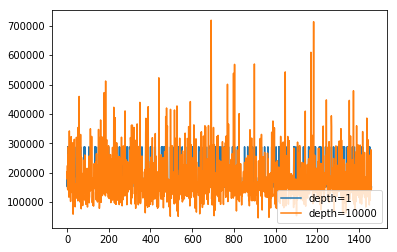

In [30]:
# randomforestのimport
from sklearn.ensemble import RandomForestRegressor

# SalePriceと相関のある10個の説明変数で行う
X, y = eleven_df.iloc[:,:-1], eleven_df.iloc[:,-1]

# ランダムフォレストの生成および訓練
# モデル１は決定木の深さを１に、モデル２は深さを１００００に設定
rf1 = RandomForestRegressor(max_depth=1)
rf2 = RandomForestRegressor(max_depth=10000)
rf1.fit(X, y)
rf2.fit(X, y)
result1 = rf1.predict(X)
result2 = rf2.predict(X)
# 生成したモデルが判断した特徴量の重要性について。
print('深さ 1 の時の各特徴量の重要性')
print(rf1.feature_importances_)
print('深さ 10000 の時の各特徴量の重要性')
print(rf2.feature_importances_)

plt.plot(result1,label="depth=1")
plt.plot(result2,label="depth=10000")
plt.legend(loc="lower right")
plt.show()

In [31]:
# testdata読み込み
test_df = pd.read_csv('test.csv')
#print(test_df)
test_ten_dict = {'OverallQual':test_df['OverallQual'], 
                    'GrLivArea':test_df['GrLivArea'],
                    'GarageCars':test_df['GarageCars'], 
                    'GarageArea':test_df['GarageArea'], 
                    'TotalBsmtSF':test_df['TotalBsmtSF'], 
                    '1stFlrSF':test_df['1stFlrSF'], 
                    'FullBath' :test_df['FullBath' ],
                    'TotRmsAbvGrd':test_df[ 'TotRmsAbvGrd'],
                    'YearBuilt':test_df['YearBuilt'],
                    'YearRemodAdd':test_df['YearRemodAdd'],
                    
                  }
test_ten_df = pd.DataFrame(test_ten_dict)
print(test_ten_df.isnull().any())

OverallQual     False
GrLivArea       False
GarageCars       True
GarageArea       True
TotalBsmtSF      True
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
dtype: bool


In [32]:
# 欠損値を平均値で補う
test_x = test_ten_df.fillna(df.mean())
print(test_x.isnull().any())

OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
dtype: bool


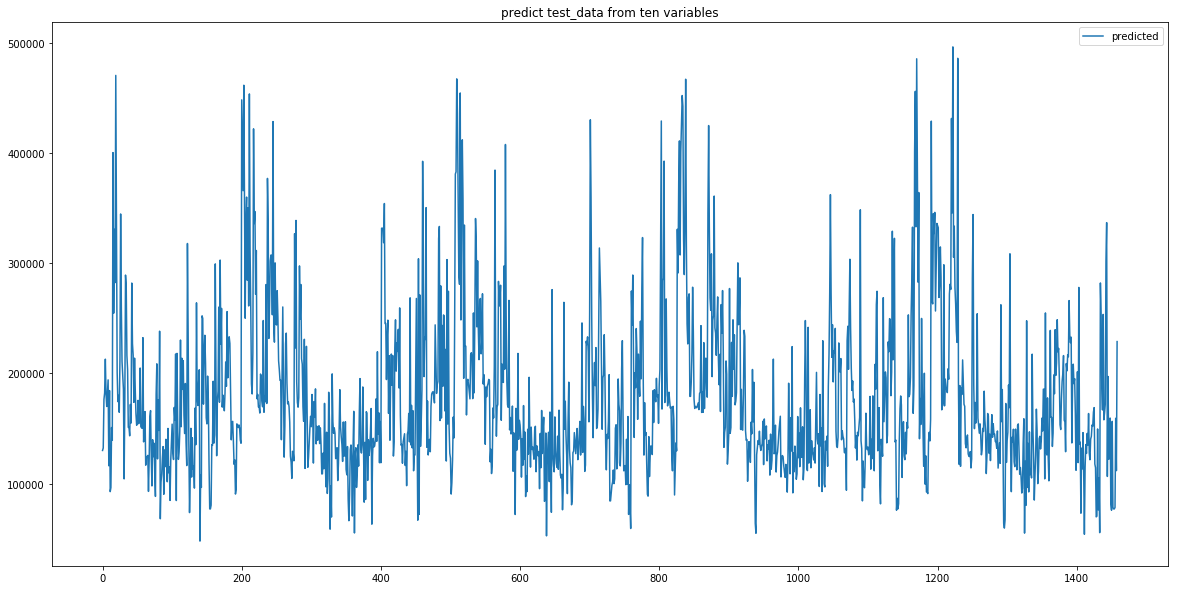

In [33]:
# rf2で予測してみる
# 残念ながら正解ラベルなし
predict_test = rf2.predict(test_x)

plt.figure(figsize=(20,10))
plt.title('predict test_data from ten variables')
plt.plot(predict_test, label="predicted")
plt.legend()
plt.show()